In [1]:
"""
Statistics: count difference between anti-deuteron and anti-proton
@aurthor Jiancheng Zeng
@July 15 2021

"""

'\nStatistics: count difference between anti-deuteron and anti-proton\n@aurthor Jiancheng Zeng\n@July 15 2021\n\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
from numpy import array
import pandas as pd

case1 = []
case2 = []
case3 = []
case4 = []
vector = []
event = []
identical = []
case4len = []

"""
Select by name of the column
---------------------
"""
title = ["eventID", "trackID", "parentID", "particleID", "copyNb1 (mother volume)", "copyNb", "material", "time (ns)", "energy(MeV)", "energy deposit(MeV)", "parent process name", "process name", "px (MeV/c)", "py (MeV/c)", "pz (MeV/c)", "step length (cm)", "x (cm)", "y (cm)", "z (cm)"]

"""
Read data from total data file
--------------------
"""
print("Reading data ...")
#data = pd.read_table("/Users/jiancheng/GRAMS/Toy Model/Machine Learning/210824_anti_deuteron_500MeV_Lin.dat")    #get data file
data = pd.read_table("/Users/jiancheng/CloudDocuments/Documents/Github/Geant4-simulation/Original_2021/output/test_deuteron.dat")
print("finish reading data!")

"""
modification
"""
print("Modifing data ...")
for i in range(len(data.iloc[:,0])):
    if(0 <= data.iloc[i,2] <= 1):
        event.append(list(data.iloc[i,:]))
    print("Modifing process:"+str(int(100*i/len(data.iloc[:,0])))+"%", end='\r')
event = np.array(event)

np.savetxt('/Users/jiancheng/GRAMS/Toy Model/Machine Learning/test.txt', event, fmt='%s')
print("finished!")

Reading data ...
finish reading data!
Modifing data ...
finished!process:99%


In [3]:
"""
recognize the data file length distribution
"""
print("\n Recognize events ...")
s = 0
for s in range(len(event[:,0])-1):
    if(int(event[s,0]) != int(event[s+1,0])):
        identical.append(s+1)
    print("Recognizing process:"+str(int(100*s/len(event[:,0])))+"%", end='\r')
    #time.sleep(0.001)
selection = np.split(event, identical)

case = np.full(
  shape=len(identical)+1,
  fill_value=1,
  dtype=int
)

np.savetxt('/Users/jiancheng/GRAMS/Toy Model/Machine Learning/test/test.txt', selection, fmt='%s')
print("\n recognition finished!")


 Recognize events ...
Recognizing process:99%
 recognition finished!


/Users/jiancheng/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [4]:
"""
counting
"""
print("\n Selecting ...")
#print(selection[2][14][11])
for k in range(len(identical)+1):
    for j in range(selection[k].shape[0]):
        case[k] = 4
        if(str(selection[k][j][3]) == '-2112'):
            case[k] = 2
            break
        elif(str(selection[k][j][3]) == '-2212'):
            case[k] = 3
            break
    if(case[k] == 1):
        case1.extend(array(selection[k]))
    if(case[k] == 2):
        case2.extend(array(selection[k]))
    if(case[k] == 3):
        case3.extend(array(selection[k]))
    if(case[k] == 4):
        case4.extend(array(selection[k]))
        case4len.append(len(selection[k]))
    print("selection progress:"+str(int(100*k/len(identical)))+"%", end='\r')

"""
save different kind of evnets to different files
"""
np.savetxt("/Users/jiancheng/GRAMS/Toy Model/Machine Learning/test/case1.txt", case1, delimiter = ",  ", fmt = "%s")
np.savetxt("/Users/jiancheng/GRAMS/Toy Model/Machine Learning/test/case2.txt", case2, delimiter = ",  ", fmt = "%s")
np.savetxt("/Users/jiancheng/GRAMS/Toy Model/Machine Learning/test/case3.txt", case3, delimiter = ",  ", fmt = "%s")
np.savetxt("/Users/jiancheng/GRAMS/Toy Model/Machine Learning/test/case4.txt", case4, delimiter = ",  ", fmt = "%s")

print("\n Counting 100% finished!")


 Selecting ...
selection progress:100%
 Counting 100% finished!


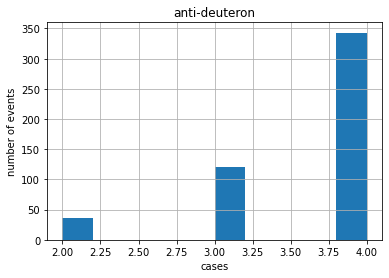

[4 2 4 3 4 4 4 2 4 4 3 3 4 4 3 4 4 4 3 4 3 4 4 2 4 3 4 4 4 4 2 4 4 4 3 4 3
 4 4 4 4 4 4 4 3 4 4 4 3 4 4 3 4 4 3 4 3 4 3 4 3 3 4 4 4 4 3 4 4 4 4 4 3 3
 4 4 4 4 4 3 4 4 4 4 3 4 4 4 3 2 3 4 4 4 3 4 3 4 3 3 3 3 3 4 4 4 4 3 4 4 4
 3 3 4 3 3 4 4 4 2 4 4 4 3 4 4 3 4 4 4 4 4 3 4 4 4 2 4 4 4 4 3 3 4 3 4 4 4
 3 4 4 4 3 4 4 4 2 4 4 4 3 3 4 3 4 4 3 3 2 2 4 4 4 3 4 3 2 4 4 4 4 4 4 4 4
 4 4 4 3 4 4 3 4 2 3 4 4 4 3 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 3 4 4 4 4 2 4 4
 4 4 4 4 3 4 3 4 4 3 4 4 4 3 4 4 4 4 3 3 4 4 3 4 4 4 4 4 4 4 4 2 4 4 3 3 4
 4 4 2 4 3 4 3 4 2 4 4 4 4 4 4 4 4 3 3 3 2 4 4 4 4 4 4 4 4 4 3 4 3 4 3 3 2
 4 4 4 3 3 4 4 4 4 4 4 4 4 4 4 4 2 4 3 4 3 2 4 3 4 4 4 4 4 4 2 4 4 3 4 4 4
 4 3 4 3 4 4 4 3 2 3 3 4 4 4 3 4 4 3 4 3 2 3 2 3 4 4 4 4 4 3 4 4 4 4 4 3 4
 4 4 3 3 4 4 4 4 4 4 3 3 4 4 4 4 4 4 4 3 3 4 4 4 3 4 2 3 4 3 4 3 4 4 3 3 2
 3 4 3 4 4 4 3 4 4 4 4 4 4 4 4 2 4 4 3 4 2 3 4 3 4 3 4 3 4 3 4 4 4 3 4 4 4
 4 4 4 3 3 4 4 2 4 2 4 3 4 4 4 3 4 4 4 4 2 4 4 4 2 4 4 4 4 4 4 4 4 4 4 3 4
 4 4 4 4 4 2 4 4 4 4 3 3 

In [5]:
plt.hist(case)
plt.xlabel('cases')
plt.ylabel('number of events')
plt.title('anti-deuteron')
plt.grid()
plt.show()
print(case)
print(len(case))
#print("\n", case1, "\n", case2, "\n", case3, "\n", case4, "\n")
print("finished!")

In [6]:
"""
display event pecentage
"""
print("case2:"+str(sum(case == 2)*100/(len(identical)+1))+"%")
print("case3:"+str(sum(case == 3)*100/(len(identical)+1))+"%")
print("case4:"+str(sum(case == 4)*100/(len(identical)+1))+"%")

case2:7.2%
case3:24.2%
case4:68.6%


In [ ]:
"""
select annihilation in flight
"""


In [33]:
import math
PeD = [None] * sum(case == 4)    #Penetration depth
EnD = [None] * sum(case == 4)    #Energy deposit
NuPip = [0] * sum(case == 4)     #Number of pion+
NuPim = [0] * sum(case == 4)     #Number of pion-
NuPi0 = [0] * sum(case == 4)     #Number of neutral pion
NuPiC = [0] * sum(case == 4)      #Number of charged pion
NuP = [0] * sum(case == 4)       #Number of proton
#XRay = [0] * sum(case == 4)      #X-ray
lDetector = 2000                 #detector depth
temp = 0
En = 80
inflight = []
print(len(PeD))

"""
find penatration depth, Energy depesite and number of pions
"""
for i in range(sum(case == 4)):
    for j in range(case4len[i]):
        if(case4[temp + j][3] !=  '-1000010020'):
            PeD[i] = math.sqrt((lDetector - float(case4[temp + j - 1][18])) ** 2 + (float(case4[temp + j - 1][17])) ** 2 + (float(case4[temp + j - 1][16])) ** 2)
            EnD[i] = float(case4[temp][8])
            if(case4[temp + j - 1][8] != case4[temp + j - 1][9]): inflight.append(i)
            break
    for k in range(case4len[i]-1):
        if(case4[temp + k][1] != case4[temp + k+1][1]):
            if(case4[temp + k][3] == '211'):
                NuPip[i] = NuPip[i] + 1
                NuPiC[i] = NuPiC[i] + 1
            elif(case4[temp + k][3] == '-211'):
                NuPim[i] = NuPim[i] + 1
                NuPiC[i] = NuPiC[i] + 1
            elif(case4[temp + k][3] == '111'):
                NuPi0[i] = NuPi0[i] + 1
            elif(case4[temp + k][3] == '2212'):
                NuP[i] = NuP[i] + 1
    if(case4[temp + case4len[i] - 1][3] == '211'):    #specify last track
        NuPip[i] = NuPip[i] + 1
        NuPiC[i] = NuPiC[i] + 1
    elif(case4[temp + case4len[i] - 1][3] == '-211'):
        NuPim[i] = NuPim[i] + 1
        NuPiC[i] = NuPiC[i] + 1
    elif(case4[temp + case4len[i] - 1][3] == '111'):
        NuPi0[i] = NuPi0[i] + 1
    elif(case4[temp + case4len[i] - 1][3] == '2212'):
        NuP[i] = NuP[i] + 1
    temp = temp + case4len[i]
    
"""
print("penetration depth:")
print(PeD)
print("\n number of pi+:")
print(NuPip)
print("\n number of pi-:")
print(NuPim)
print("\n number of pi0:")
print(NuPi0)
print("\n number of proton:")
print(NuP)
"""

vector=[PeD, EnD, NuPiC, NuP]    #vector content follow by: Penetration depth, energy diposit, number of charged pions, number of protons
vector=np.transpose(vector)
vector = pd.DataFrame(vector)
vector = vector.drop(labels = inflight)

print(len(vector))

np.savetxt('/Users/jiancheng/GRAMS/Toy Model/Machine Learning/test/test_d_vector.txt', vector, delimiter = '\t ', fmt='%.6s')
print("Done! Vector saved!")


343
192
Done! Vector saved!


In [34]:
print(len(vector)/len(PeD))

0.5597667638483965
